In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def f(x):
    return -2*x-6*x**2

def k(x):
    return x**2

def exact(x):
    return x*(1+x)

In [9]:
alpha=0
beta=2
a=0
b=1
N=100
h=(b-a)/N
x2=np.arange(a,b+h,h)
x=[]
F=np.zeros(N-1)
A=np.zeros((N-1,N-1))
for i in range(N-1):
    x1=a+(i+1)*h
    x.append(x1)
    F[i]=h**2*f(x[i])
    F[0]=f(x[0])*h**2+alpha*k(h/2)
    F[N-2]=F[N-2]+beta*k(N*h-h/2)

for i in range(N-2):
    A[i,i]=k(x[i]-h/2)+k(x[i]+h/2)
    A[i,i+1]=-k(x[i]+h/2)
    A[i+1,i]=-k(x[i]+h/2)
    A[N-2,N-2]=k(N*h-h/2)+k(h*N-3*h/2)

In [10]:
U=np.matmul(np.linalg.inv(A),F)

In [11]:
U1= [alpha]+U.tolist()+[beta]
x1=[a]+x+[b]
y=exact(x2)

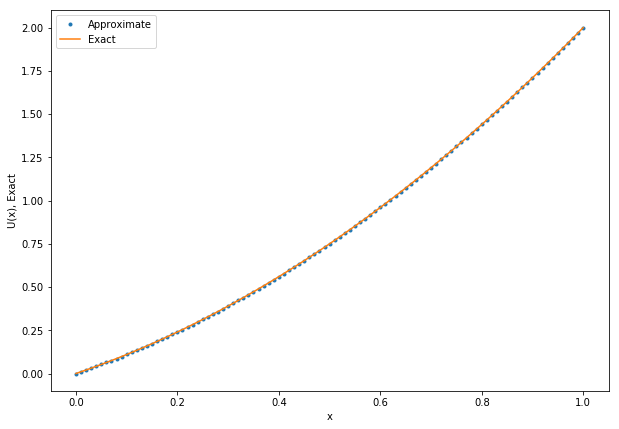

In [12]:
plt.figure(figsize=(10,7))
plt.plot(x1,U1,".")
plt.plot(x2,y)
plt.legend(["Approximate","Exact"])
plt.xlabel("x")
plt.ylabel("U(x), Exact")
plt.show()